### Problem statement
For selecting a candidate in Campus recruitment, there are various factors which are considered. Students from a particular University also want to know the factors upon which he/she will get placed. 

### Objective
Follow the Data Science Methodology to analyze the data set and identify the parameters that affects the campus recruitment. Answer the questions like 
- Which factor influenced a candidate in getting placed? 
- Do percentage matters for one to get placed? 
- Which degree specialization is much demanded by corporate? 

#### Import required libraries 

In [1]:
# Convert jupyter notebook into full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Reset all variables and objects in notebook
%reset -f 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import math
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

#### Import data 

In [3]:
df = pd.read_csv('Placement_Data_Full_Class-1.csv')

In [4]:
# copy original dataset into another varialble
df_raw = df.copy(deep=True)

## 1. Perform exploratory data analysis(EDA) 

### 1.1 : Understanding the dataset 

In [5]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### 1.2 : Checking is there any null values

In [8]:
df.isnull().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [9]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

- We have missing values only in **salary** column
- Total **67** values are missing from **salary** column

In [10]:
df[df.isna().any(axis=1)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


### 1.3: Perform Exploratory Data Analysis(EDA) with each feature

#### 1.3.1: Gender and Status

In [11]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

C:\Users\ABCD\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


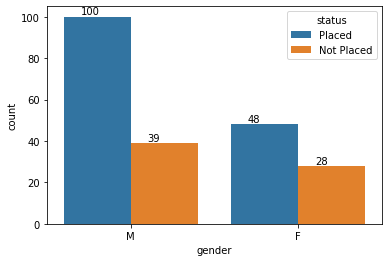

In [12]:
ax = sns.countplot("gender", hue="status", data=df)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
plt.show()

In [13]:
for category in df['gender'].unique():
    total_stud = df[ df['gender'] == category ].shape[0]
    placed_stud = df[ (df['gender'] == category) & (df['status'] == 'Placed') ].shape[0]
    per_stud = ( placed_stud / total_stud ) * 100
    print('Percentage of student placed for gender  {:5} out of total student of same gender : {:.2f}%'.format( category, per_stud))

Percentage of student placed for gender  M     out of total student of same gender : 71.94%
Percentage of student placed for gender  F     out of total student of same gender : 63.16%


**Observations**
- **Male :** Total 139 male students are present out of that 100 student `got placed`. Which is become `71.94% of total male students`
- **Female :** Total 48 female studeds present and out of that 48 `got placed`. Which is become `63.15% of total female students`

#### 1.3.2: ssc_p(SSC percentage), ssc_b (board of education) and status of placement

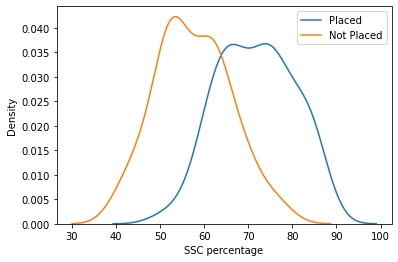

In [14]:
sns.kdeplot(df.ssc_p[df.status=="Placed"])
sns.kdeplot(df.ssc_p[df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("SSC percentage")
plt.show()

**Observations**
- Percentage in SSC is matter to get placed. If more the percentage chances of getting placed is higher.
- All students with aprox above 90% got placed
- All students with aprox below 40% are not placed

In [15]:
df["ssc_b"].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

C:\Users\ABCD\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


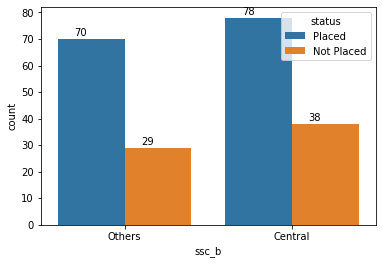

In [16]:
ax = sns.countplot("ssc_b", hue="status", data=df)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
plt.show()

In [17]:
for degree_t in df['ssc_b'].unique():
    total_stud = df[ df['ssc_b'] == degree_t ].shape[0]
    placed_stud = df[ (df['ssc_b'] == degree_t) & (df['status'] == 'Placed') ].shape[0]
    per_stud = ( placed_stud / total_stud ) * 100
    print('Percentage of student placed for SSC board  {:10} out of total student of same board : {:.2f}%'.format( degree_t, per_stud))

Percentage of student placed for SSC board  Others     out of total student of same board : 70.71%
Percentage of student placed for SSC board  Central    out of total student of same board : 67.24%


**Observation**
- More number of students are from central board i.e. 116.
- Total 78 students from `central board` are `got placed`. Which is become `67.24% of total students in cetral board.`
- From `other borads` total 99 students and out of that 70 `got placed`. Which is become `70.70% of total students in other board`.
- From above we can conclude that board is not making huge difference in placement of student because for central and other board percentage of placement of student is don't have huge difference.

#### 1.3.3: hsc_p(HSC percentage), hsc_b(Board of education), hsc_s (Specialization in HSC) and status of placement

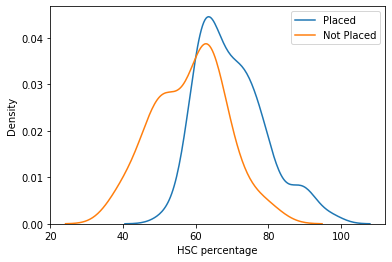

In [18]:
sns.kdeplot(df.hsc_p[df.status=="Placed"])
sns.kdeplot(df.hsc_p[df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("HSC percentage")
plt.show()

**Observation**
- HSC percentage is matter becuase when percentage is more then more students are getting placed.
- All student approx above 95% are got placed
- All student approx below 40% are not placed
- Lot of overlap from 55% to 65%. Still 65% there is sharp increase placed students.

In [19]:
df['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

C:\Users\ABCD\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


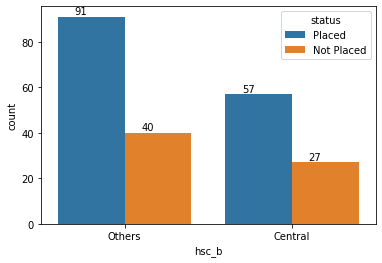

In [20]:
ax = sns.countplot("hsc_b", hue="status", data=df)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
plt.show()

In [21]:
for degree_t in df['hsc_b'].unique():
    total_stud = df[ df['hsc_b'] == degree_t ].shape[0]
    placed_stud = df[ (df['hsc_b'] == degree_t) & (df['status'] == 'Placed') ].shape[0]
    per_stud = ( placed_stud / total_stud ) * 100
    print('Percentage of student placed for HSC board  {:10} out of total student of same board : {:.2f}%'.format( degree_t, per_stud))

Percentage of student placed for HSC board  Others     out of total student of same board : 69.47%
Percentage of student placed for HSC board  Central    out of total student of same board : 67.86%


**Observations**
- `Other board` is having 131 students and 91 `got placed` which is `69.46% of total students from other board`
- `Central board` is having 84 students and 57 `got placed` which is `67.85% of total students from central board`
- If we look at percentage of placements we can say board is not making not much difference in placement

In [22]:
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

C:\Users\ABCD\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


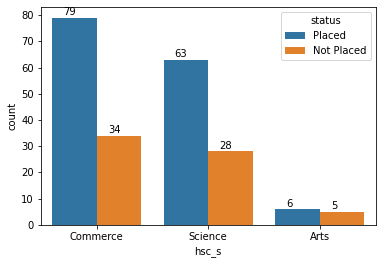

In [23]:
ax = sns.countplot("hsc_s", hue="status", data=df)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
plt.show()

In [24]:
for degree_t in df['hsc_s'].unique():
    total_stud = df[ df['hsc_s'] == degree_t ].shape[0]
    placed_stud = df[ (df['hsc_s'] == degree_t) & (df['status'] == 'Placed') ].shape[0]
    per_stud = ( placed_stud / total_stud ) * 100
    print('Percentage of student placed for HSC specialization  {:10} out of total student of same specialization : {:.2f}%'.format( degree_t, per_stud))

Percentage of student placed for HSC specialization  Commerce   out of total student of same specialization : 69.91%
Percentage of student placed for HSC specialization  Science    out of total student of same specialization : 69.23%
Percentage of student placed for HSC specialization  Arts       out of total student of same specialization : 54.55%


**Observation**
- `Commerce` is having total 113 students and 79 `got placed`. Which is `69.91% of total commerce students.`
- `Science` is having total 91 students and 63 `got placed`. Which is `69.23% of total Science students.`
- `Arts` is having total 11 students and 6 `got placed` which is `54.54% of total Arts students.`
- As Arts is having much less number of students as compare to other specialization hence it is difficult to say that less student get placed for this specialization
- Overall this is having slightly impact on placement of student.

#### 1.3.4: degree_p (Degree Percentage), degree_t (Degree field) and status of placement

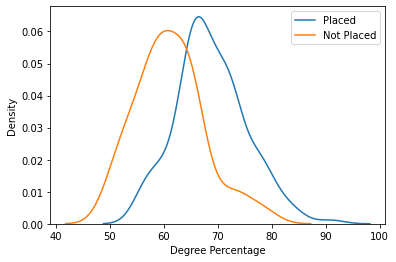

In [25]:
sns.kdeplot(df.degree_p[ df.status=='Placed'])
sns.kdeplot(df.degree_p[ df.status=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.xlabel('Degree Percentage')
plt.show()

**Observation**
- All students approx above 88% are got placed
- All students approx below 48% are not placed
- There is strong overlap between students placed and not placed near to 65% 
- Percentage in degree affects student placement. As degree percentage increases more number of studnets are getting placed.

In [26]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

C:\Users\ABCD\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


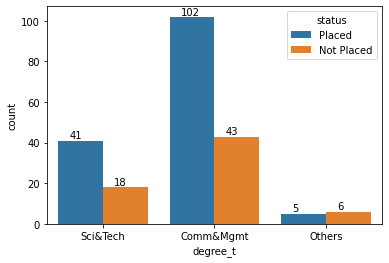

In [27]:
ax = sns.countplot("degree_t", hue="status", data=df)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
plt.show()

In [28]:
for degree_t in df['degree_t'].unique():
    total_stud = df[ df['degree_t'] == degree_t ].shape[0]
    placed_stud = df[ (df['degree_t'] == degree_t) & (df['status'] == 'Placed') ].shape[0]
    per_stud = ( placed_stud / total_stud ) * 100
    print('Percentage of student placed for degree field  {:10} out of total student of same field : {:.2f}%'.format( degree_t, per_stud))

Percentage of student placed for degree field  Sci&Tech   out of total student of same field : 69.49%
Percentage of student placed for degree field  Comm&Mgmt  out of total student of same field : 70.34%
Percentage of student placed for degree field  Others     out of total student of same field : 45.45%


**Observation**
- `Sci&Tech` is having total 59 students and 41 `got placed`. Which is `69.49% of total Sci&Tech students.`
- `Comm&Mgmt` is having total 145 students and 102 `got placed`. Which is `70.34% of total Comm&Mgmt students.`
- `Other` field is having total 11 students and 5 `got placed` which is `45.45% of total Other students.`
- As `Other` field is having much less number of students as compare to other specialization hence it is difficult to say that less student get placed for this specialization. Still it `Sci&Tech` and `Comm&Mgmt` is better choice that `Other` field
- Overall this is having slightly impact on placement of student.

#### 1.3.4: workex (Work experience) and status of placement

In [29]:
df['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

C:\Users\ABCD\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


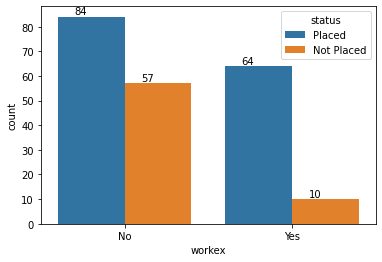

In [30]:
ax = sns.countplot("workex", hue="status", data=df)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
plt.show()

In [31]:
for categoary in df['workex'].unique():
    total_stud = df[ df['workex'] == categoary ].shape[0]
    placed_stud = df[ (df['workex'] == categoary) & (df['status'] == 'Placed') ].shape[0]
    per_stud = ( placed_stud / total_stud ) * 100
    print('Percentage of student placed with  {:5} work experience out of total  {:5} work experience : {:.2f}%'.format( categoary, categoary, per_stud))

Percentage of student placed with  No    work experience out of total  No    work experience : 59.57%
Percentage of student placed with  Yes   work experience out of total  Yes   work experience : 86.49%


**Observation**
- `No work experience` is having total 141 students and 84 `got placed`. Which is `59.57% of total No work experience students.`
- Total 74 students having `work expericne` and 64 `got placed`. Which is `86.49% of total work experince students.`
- From above it is clear that work experience is affecitng a lot for placement.

#### 1.3.4: specialisation, mba_p (MBA percentage) and status of placement

In [32]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

C:\Users\ABCD\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


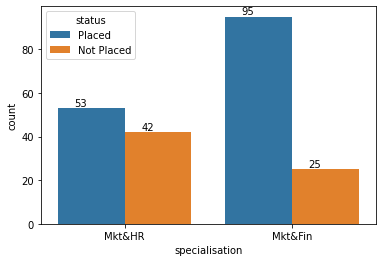

In [33]:
ax = sns.countplot("specialisation", hue="status", data=df)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
plt.show()

In [34]:
for categoary in df['specialisation'].unique():
    total_stud = df[ df['specialisation'] == categoary ].shape[0]
    placed_stud = df[ (df['specialisation'] == categoary) & (df['status'] == 'Placed') ].shape[0]
    per_stud = ( placed_stud / total_stud ) * 100
    print('Percentage of student placed with specialization  {:5} out of toal students from same specialization : {:.2f}%'.format(categoary, per_stud))

Percentage of student placed with specialization  Mkt&HR out of toal students from same specialization : 55.79%
Percentage of student placed with specialization  Mkt&Fin out of toal students from same specialization : 79.17%


**Observation**
- `Mkt&HR` is having total 95 students and 53 `got placed`. Which is `55.79% of total Mkt&HR students.`
- `Mkt&Fin` is having total 120 students and 95 `got placed`. Which is `79.17% of total Mkt&Fin students.`
- From above it is clear that specialization is making impact on placement of student

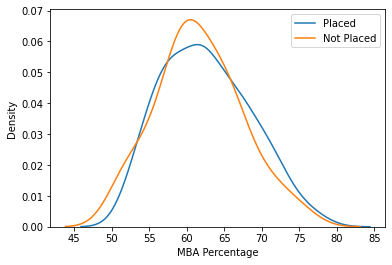

In [35]:
sns.kdeplot(df.mba_p[ df.status=='Placed'])
sns.kdeplot(df.mba_p[ df.status=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.xlabel('MBA Percentage')
plt.show()

**Observation**
- There is lot of overlap between students placed and not placed with respect to percentage in MBA. So there is no strong relation between percentage of MBA and student placement.

### 1.4 : Now we convert all string data types into numeric 

In [36]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

##### 1.4.1 : Convert string data into categoary data type 

In [37]:
df["gender"] = df["gender"].astype('category')
df["ssc_b"] = df["ssc_b"].astype('category')
df["hsc_b"] = df["hsc_b"].astype('category')
df["hsc_s"] = df["hsc_s"].astype('category')
df["degree_t"] = df["degree_t"].astype('category')
df["workex"] = df["workex"].astype('category')
df["specialisation"] = df["specialisation"].astype('category')
df["status"] = df["status"].astype('category')

In [38]:
df.dtypes

sl_no                int64
gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
salary             float64
dtype: object

##### 1.4.2 : Convert  category data type to numeric data type

In [39]:
# Create dictionary of each category
dict_gender = dict(enumerate(df["gender"].cat.categories))
dict_ssc_b = dict(enumerate(df["ssc_b"].cat.categories))
dict_hsc_b = dict(enumerate(df["hsc_b"].cat.categories))
dict_hsc_s = dict(enumerate(df["hsc_s"].cat.categories))
dict_degree_t = dict(enumerate(df["degree_t"].cat.categories))
dict_workex = dict(enumerate(df["workex"].cat.categories))
dict_specialisation = dict(enumerate(df["specialisation"].cat.categories))
dict_status = dict(enumerate(df["status"].cat.categories))

In [40]:
print('Dictionary of gender          : ', dict_gender)
print('Dictionary of ssc_b           : ', dict_ssc_b)
print('Dictionary of hsc_b           : ', dict_hsc_b)
print('Dictionary of hsc_s           : ', dict_hsc_s)
print('Dictionary of degree_t        : ', dict_degree_t)
print('Dictionary of workex          : ', dict_workex)
print('Dictionary of specialisation  : ', dict_specialisation)
print('Dictionary of status          : ', dict_status)

Dictionary of gender          :  {0: 'F', 1: 'M'}
Dictionary of ssc_b           :  {0: 'Central', 1: 'Others'}
Dictionary of hsc_b           :  {0: 'Central', 1: 'Others'}
Dictionary of hsc_s           :  {0: 'Arts', 1: 'Commerce', 2: 'Science'}
Dictionary of degree_t        :  {0: 'Comm&Mgmt', 1: 'Others', 2: 'Sci&Tech'}
Dictionary of workex          :  {0: 'No', 1: 'Yes'}
Dictionary of specialisation  :  {0: 'Mkt&Fin', 1: 'Mkt&HR'}
Dictionary of status          :  {0: 'Not Placed', 1: 'Placed'}


In [41]:
df["gender"] = df["gender"].cat.codes
df["ssc_b"] = df["ssc_b"].cat.codes
df["hsc_b"] = df["hsc_b"].cat.codes
df["hsc_s"] = df["hsc_s"].cat.codes
df["degree_t"] = df["degree_t"].cat.codes
df["workex"] = df["workex"].cat.codes
df["specialisation"] = df["specialisation"].cat.codes
df["status"] = df["status"].cat.codes

In [42]:
df.dtypes

sl_no               int64
gender               int8
ssc_p             float64
ssc_b                int8
hsc_p             float64
hsc_b                int8
hsc_s                int8
degree_p          float64
degree_t             int8
workex               int8
etest_p           float64
specialisation       int8
mba_p             float64
status               int8
salary            float64
dtype: object

In [43]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [44]:
# Store data into another variable before performing preprocession
df_numeric = df.copy(deep=True)

### 1.5 : Missing values 

In [45]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

- `Salary` column has some missing values. But salary column may have missing values because student is not placed yet. So we will first find missing salaries where student is placed

In [46]:
df[(df['status'] == 1) & (df['salary'].isnull())].count()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

- **From above we conclude that salaryies missing for those who are not placed yet**

- **Missing values of salary :** As salary is missing only for students those are not placed so we can fill salary as zero for all missing values.
- **Impute value in salary column :** As it is possible that student may get unpaid internship and his salary is zero. So to differentiate between unpaid placed student and unplaced student we will impute negative value in salary table. Because students will not get negative salary. Hence we are `imputing -1 for missing salaries for unplaced students.`

In [47]:
df['salary'].fillna(-1, inplace=True)

In [48]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

- **Now we don't have any missing values**

### 1.6 : Remove unwanted feature based on understanding related to dataset

- **sl_no** : This is not at all important feature while predicting anything related to placement. So we can drop it.

In [49]:
df.drop(["sl_no"], axis=1, inplace=True)

### 1.7 : Check frequency of values in column 

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'ssc_p'}>,
        <AxesSubplot:title={'center':'ssc_b'}>,
        <AxesSubplot:title={'center':'hsc_p'}>],
       [<AxesSubplot:title={'center':'hsc_b'}>,
        <AxesSubplot:title={'center':'hsc_s'}>,
        <AxesSubplot:title={'center':'degree_p'}>,
        <AxesSubplot:title={'center':'degree_t'}>],
       [<AxesSubplot:title={'center':'workex'}>,
        <AxesSubplot:title={'center':'etest_p'}>,
        <AxesSubplot:title={'center':'specialisation'}>,
        <AxesSubplot:title={'center':'mba_p'}>],
       [<AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

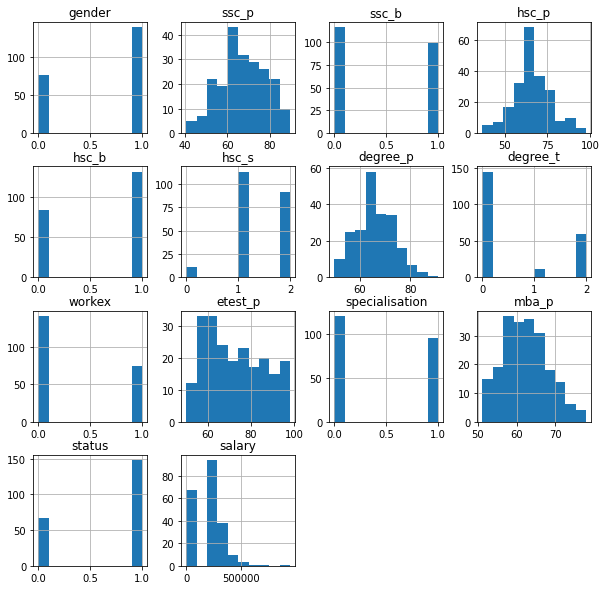

In [50]:
df.hist(figsize=(10,10))

- From above plot look like there is no outlier in dataset. Now we will proceed with remaining analysis to find outlier and less important features
- Additonally **status** column is having imbalance data entries

<AxesSubplot:>

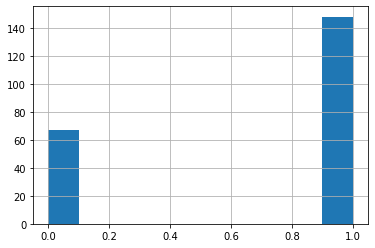

In [51]:
df['status'].hist()

In [52]:
(df['status'].value_counts() /df['gender'].count())*100

1    68.837209
0    31.162791
Name: status, dtype: float64

- **Imbalance dataset :** This is a imbalance dataset because it is having **69.90%** of placed student data and remaing **30.09%** of not placed students 

### 1.8 : As number of fetures are less so we can visualize the scatter plot for pair of features

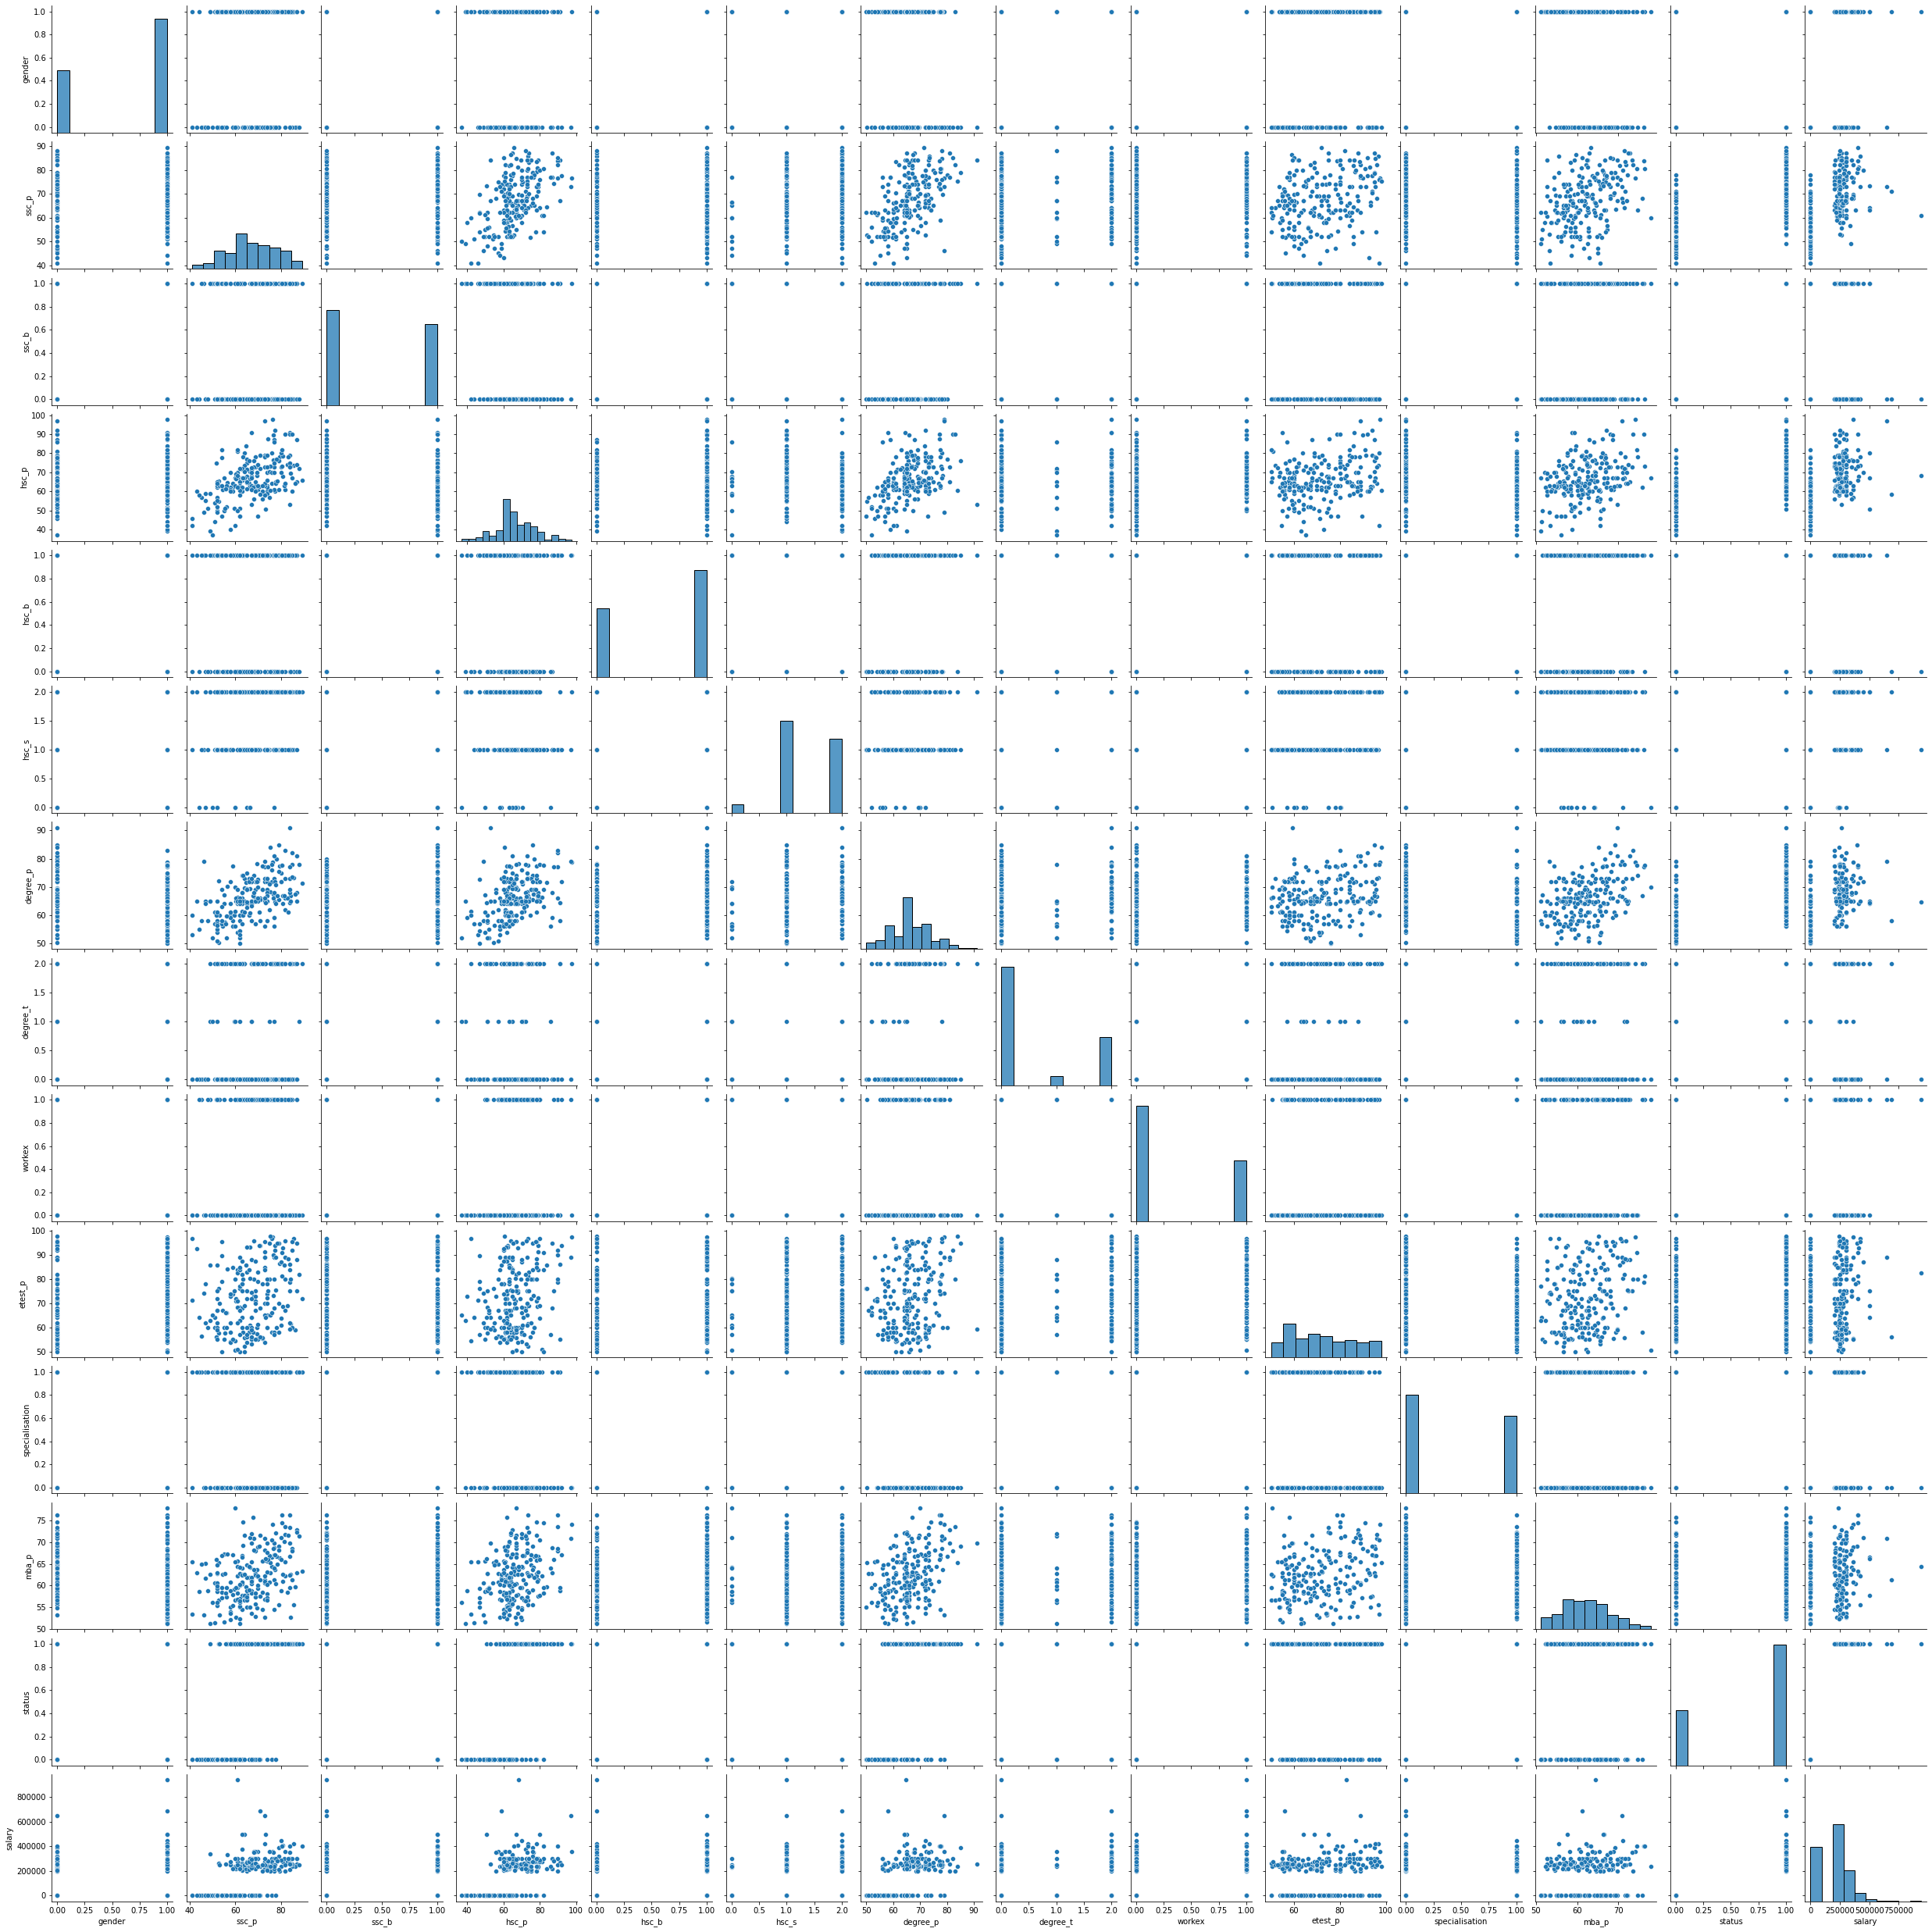

In [53]:
sns.pairplot(df)

### 1.9 : Fix outliers 

##### 1.9.1 : Find outliers using boxplot 

In [54]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

<AxesSubplot:xlabel='variable', ylabel='value'>

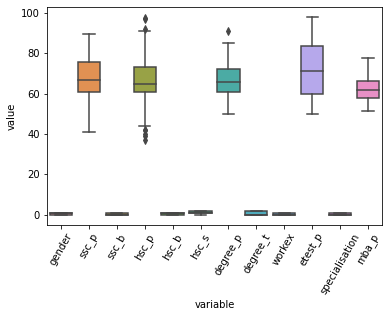

In [55]:
col_name = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status']
data = pd.melt(df[col_name].drop('status', axis=1))
plt.xticks(rotation=60)
sns.boxplot(x="variable", y="value", data=data)

- From above plot we can see there are few outliers in feature **hsc_p** and **degree_p**
- We will use mathematical approach to find outliers

In [56]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372,198702.013953
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240,154781.328642
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,-1.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,-1.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000,240000.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


**IQR : We will this approach to find outliers and create range for lower bound and upper bound. Accordingly we can find outliers automatically.**

In [57]:
Q1 = df[col_name].quantile(0.25)
Q3 = df[col_name].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

- Now we will find percentage of values for each column lower than there lower boundary value
- **ssc_p, hsc_p, degree_p, etest_p, mba_p** : As this columns contains percentage of respective educational year hence we may get outliers only in this columns
- Remaing column contains categorical data and after looking at there boxplot don't look like they have outliers

In [58]:
sub_col = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]
size = len(sub_col) - 1 # As we are not going to consider 

for col in sub_col: 
    per_value = (df[col][df[col] < lower_boundary[col]].count() / df[col].count()) * 100
    print('Percentage of values lower than lower bound in {:15} : {:.4f}'.format(col, per_value))

Percentage of values lower than lower bound in ssc_p           : 0.0000
Percentage of values lower than lower bound in hsc_p           : 2.3256
Percentage of values lower than lower bound in degree_p        : 0.0000
Percentage of values lower than lower bound in etest_p         : 0.0000
Percentage of values lower than lower bound in mba_p           : 0.0000


- **Now we will find outliers for columns in terms of upper bound**

In [59]:
sub_col = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]
size = len(sub_col) - 1 # As we are not going to consider 

for col in sub_col: 
    per_value = (df[col][df[col] > upper_boundary[col]].count() / df[col].count()) * 100
    print('Percentage of values upper than upper bound in {:15} : {:.4f}'.format(col, per_value))

Percentage of values upper than upper bound in ssc_p           : 0.0000
Percentage of values upper than upper bound in hsc_p           : 1.3953
Percentage of values upper than upper bound in degree_p        : 0.4651
Percentage of values upper than upper bound in etest_p         : 0.0000
Percentage of values upper than upper bound in mba_p           : 0.0000


- From above we can say that we minimal percentage of outliers in **hsc_p and degree_p** column
- **hsc_p** : It is having approx 2.325% values are smaller than lower bound and 1.3953% values are greater than upper bound
- **degree_p** : It is having approx 0.4651% values are greater than upper bound
- **As percentage of outliers is less so we can drop them**

In [60]:
df = df[df['hsc_p'] >= lower_boundary['hsc_p']]
df = df[df['hsc_p'] <= upper_boundary['hsc_p']]
df = df[df['degree_p'] <= upper_boundary['degree_p']]

In [61]:
df.shape

(206, 14)

## 2: Perform data pre-processing. E.g., missing data, normalization, discretization, etc

- **Missing Data :** We performed pre-processing on missing data while performing EDA as it is beneficial to understand data
- **Min max Normalization :** Applying min max normalization on data which will convert them into same scale.

In [62]:
df_preprocessed = df.copy(deep=True)
df.iloc[:,:-2] = (df.iloc[:,:-2]-df.iloc[:,:-2].min())/(df.iloc[:,:-2].max()-df.iloc[:,:-2].min())
#minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,:-1])
#df.iloc[:,:-1] = minmax_scale.transform(df.iloc[:,:-1])

In [63]:
df.iloc[:,:-2]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.538240,1.0,1.000000,1.0,0.5,0.228571,1.0,0.0,0.104167,1.0,0.282331
1,1.0,0.792414,0.0,0.730426,1.0,1.0,0.785143,1.0,1.0,0.760417,0.0,0.563534
2,1.0,0.497011,0.0,0.510638,0.0,0.0,0.400000,0.0,0.0,0.520833,0.0,0.244737
3,1.0,0.311482,0.0,0.170213,0.0,1.0,0.057143,1.0,0.0,0.333333,1.0,0.306015
4,1.0,0.925788,0.0,0.629787,0.0,0.5,0.665714,0.0,0.0,0.975000,0.0,0.158271
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,0.818594,1.0,0.808511,1.0,0.5,0.788571,0.0,0.0,0.854167,0.0,0.872180
211,1.0,0.352711,1.0,0.340426,1.0,1.0,0.628571,1.0,0.0,0.500000,0.0,0.087594
212,1.0,0.538240,1.0,0.489362,1.0,0.5,0.657143,0.0,1.0,0.187500,0.0,0.692857
213,0.0,0.682540,1.0,0.468085,1.0,0.5,0.228571,0.0,0.0,0.416667,1.0,0.336090


## 3: Apply any two feature selection engineering techniques and Compare the two selected feature engineering techniques. 

### 3.1: Chi-Sqaured for feature selection

In [64]:
chi2_scores, p_values = chi2(df.iloc[:,:-2],df.iloc[:,-2])
print("Columns of dataframe: \b", df.iloc[:,:-2].columns)
print("Chi-Squared Scores : \n",chi2_scores)
print("\np values : \n",p_values)

Columns of dataframe:  Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')
Chi-Squared Scores : 
 [1.00773351e+00 6.15089604e+00 4.57008517e-01 3.78481442e+00
 3.93470343e-03 5.59836541e-02 3.89315582e+00 4.91887349e-02
 8.99046695e+00 4.76418816e-01 7.04249872e+00 2.11207038e-02]

p values : 
 [0.31544643 0.01313455 0.49902538 0.05171965 0.94998373 0.81296041
 0.04848324 0.824481   0.00271392 0.49004894 0.00795979 0.88445061]


In [65]:
print("{:25} {:25} {:25}".format('FeatureName','Chi-Squared Scores', 'p values'))
for f_name, chi_score, p_value in zip(df.iloc[:,:-2], chi2_scores, p_values):
    print("{:25} {:25} {:25}".format(str(f_name), str(chi_score), str(p_value)))

FeatureName               Chi-Squared Scores        p values                 
gender                    1.0077335098700035        0.31544643281584317      
ssc_p                     6.150896036126959         0.013134553871795816     
ssc_b                     0.4570085173623152        0.4990253751516831       
hsc_p                     3.78481441537227          0.05171964551896732      
hsc_b                     0.003934703433922895      0.9499837260563382       
hsc_s                     0.055983654128241245      0.8129604075740403       
degree_p                  3.893155818089319         0.048483240593711396     
degree_t                  0.04918873485589038       0.8244809960881968       
workex                    8.990466945440064         0.002713916440903283     
etest_p                   0.4764188162352109        0.4900489393011698       
specialisation            7.042498719918081         0.007959790568745352     
mba_p                     0.021120703835090224      0.8844506149

- If value of Chi-Squared score is higher it means output is highly dependent on that feature. Please find key updates regarding feature
- **workex :** Chi-Squared score is the highest for this features that is **8.990466945440064**. Becuse of that this is the most important feature
- **specialisation :** This is the second most important feature for output with Chi-Squared score of **7.042498719918081**
- **hsc_b :** This is least important feature as per the Chi-Squared score which **0.00393470343392289**

- **Please find below importance of feature from higher to lower using Chi-Squared score**

| Feature name | Chi-Squared score |
| --- | -: |
|	workex	|	8.990466945	|
|	specialisation	|	7.04249872	|
|	ssc_p	|	6.150896036	|
|	degree_p	|	3.893155818	|
|	hsc_p	|	3.784814415	|
|	gender	|	1.00773351	|
|	etest_p	|	0.476418816	|
|	ssc_b	|	0.457008517	|
|	hsc_s	|	0.055983654	|
|	degree_t	|	0.049188735	|
|	mba_p	|	0.021120704	|
|	hsc_b	|	0.003934703	|



### 3.2: Wrapper-based : Recursive Feature Selection (RFE)
- In this approach we are going perform **forward feature selection** using **KNN algorithm** and figureout which is the best feature. Here in every step we are going to select best feature and add it for finding next best feature

In [66]:
import warnings
warnings.filterwarnings('ignore')

knn = KNeighborsClassifier(n_neighbors=5)
# the param forward when set to False will do sequential backward selection
sbs = SFS(knn,
           k_features=5,
           forward=True,
           scoring='accuracy')

sbs = sbs.fit(df.iloc[:,:-2],df.iloc[:,-2:-1])
print('Please find below 5 best features:  ', end='')
for feature_no in sbs.k_feature_idx_:
    print(df.iloc[:,:-2].columns[feature_no],  end=', ')

Please find below 5 best features:  ssc_p, hsc_p, hsc_s, degree_p, workex, 

- From **forward feature selection** using **KNN algorithm** we got the below five best features those are `ssc_p, hsc_p, hsc_s, degree_p, workex`

### 3.3 : Comparing feture selection techniques : Chi-Sqaured for feature selection vs. Wrapper-based : Recursive Feature Selection (RFE) (forward feature selection)
- **Chi-Sqaured for feature selection :** This technique provided five best features those are `workex, specialisation, ssc_p, degree_p, hsc_p`
- **Wrapper-based : RFE(forward feature selection) :** This technique provided five best features those are `ssc_p, hsc_p, hsc_s, degree_p, workex`
- **workex, ssc_p, degree_p, hsc_p :** This four features are part of the best five in both the feature selection technique

### 3.4: Drop features
- **hsc_b :** This feature is having least Chi-Squared value. Additionally even by using EDA they are giving least related to placement status. So it looks like they are least important. So improve time and space complexity of model we will drop them

In [67]:
df.drop(["hsc_b"], axis=1, inplace=True)

## 4: Apply any regression technique on preprocessed and without preprocessed

- **As our dataset is binary classfication where we want to figureout student is placed or not. But at the same time we have to select algorithm which is sutable to regression problem as well.**
- **As `Decision Tree` algorithim is `use for both regression and classification` problem hence we will choose this one.**

### 4.1: Applying regression technique on preprocessed data

**Spliting data into train and test**

In [68]:
feature_columns = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']
output_column = ['status']
X = df_preprocessed[feature_columns]
Y = df_preprocessed[output_column]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

**As different columns have different range of values hence dominance of few columns will be there in dataset. To avoid this we are converting it into standarize format**

In [69]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Train model using Decision Tree**

In [70]:
reg_model = DecisionTreeClassifier()
reg_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Execute ML model on testing data**

In [71]:
y_pred = reg_model.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

precision_score = TP / (FP + TP)
recall_score = TP / (FN + TP)
accuracy_score = (TP + TN)/ (TP + FN + TN + FP)
f1_score =  (2* precision_score * recall_score)/ (precision_score + recall_score)

print('True Negative:    {}'.format(TN))
print('False Negative:   {}'.format(FN))
print('True possitive:   {}'.format(TP))
print('False possitive:  {}'.format(FP))

print('Precision score:  {:.4f}'.format(precision_score))
print('Recall score:     {:.4f}'.format(recall_score))
print('Accuracy score:   {:.4f}'.format(accuracy_score))
print('F1 score :        {:.4f}'.format(f1_score))

True Negative:    13
False Negative:   3
True possitive:   38
False possitive:  8
Precision score:  0.8261
Recall score:     0.9268
Accuracy score:   0.8226
F1 score :        0.8736


- **Accuray** of model is approx **82.26%** and **F1 score** is **87.36%**

### 4.2: Applying regression technique on data without preprocessed 

**Spliting data into train and test**

In [72]:
feature_columns = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']
output_column = ['status']
X = df_numeric[feature_columns]
Y = df_numeric[output_column]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

**As different columns have different range of values hence dominance of few columns will be there in dataset. To avoid this we are converting it into standarize format**

In [73]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Train model using Decision Tree**

In [74]:
reg_model = DecisionTreeClassifier()
reg_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Execute ML model on testing data**

In [75]:
y_pred = reg_model.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

precision_score = TP / (FP + TP)
recall_score = TP / (FN + TP)
accuracy_score = (TP + TN)/ (TP + FN + TN + FP)
f1_score =  (2* precision_score * recall_score)/ (precision_score + recall_score)

print('True Negative:    {}'.format(TN))
print('False Negative:   {}'.format(FN))
print('True possitive:   {}'.format(TP))
print('False possitive:  {}'.format(FP))

print('Precision score:  {:.4f}'.format(precision_score))
print('Recall score:     {:.4f}'.format(recall_score))
print('Accuracy score:   {:.4f}'.format(accuracy_score))
print('F1 score :        {:.4f}'.format(f1_score))

True Negative:    17
False Negative:   6
True possitive:   38
False possitive:  4
Precision score:  0.9048
Recall score:     0.8636
Accuracy score:   0.8462
F1 score :        0.8837


- **Accuray** of model is approx **84.62%** and **F1 score** is **88.37%**

### 4.3: Comparison of result of executing Decision Tree algorithm on preprocessed data and data withoud performing preprocessing

- **Result provided by preprocessed data** 
	- Precision score:  0.8261
	- Recall score:     0.9268
	- Accuracy score:   0.8226
	- F1 score :        0.8736
- **Result provided by data without preprocessed**
	- Precision score:  0.9048
	- Recall score:     0.8636
	- Accuracy score:   0.8462
	- F1 score :        0.8837
- Data without preprocessed is giving better performance that means data already in a good shape

## 5: Answers of objective

### 5.1: Which factor influenced a candidate in getting placed?
- As per Chi-Squared score **workex** is the most influence factor getting placed
- Additionally, **ssc_p, degree_p, hsc_p** feature are from top five features by Chi-Squared and Wrapper-based : Recursive Feature Selection (RFE) (forward feature selection)
- As per Chi-Squared socre `specialisation` is also one of the feature from top five 
- As per Wrapper-based : Recursive Feature Selection (RFE) (forward feature selection) `hsc_s` is also one of the feature from top five  

### 5.2: Do percentage matters for one to get placed? 
- Yes, percentage is matters while getting placed. ` ssc_p, degree_p, hsc_p` this three part of top five features.
- Additionally, as per Chi-Squared score `mba_p` is matter less and this is second least important feature from all features

### 5.3: Which degree specialization is much demanded by corporate? 

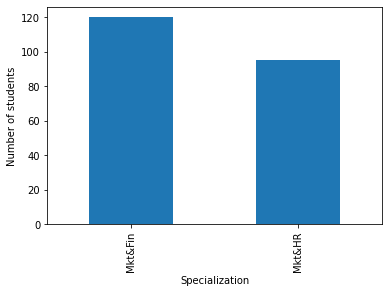

In [76]:
fig, ax = plt.subplots()
ax.set_xlabel('Specialization')  
ax.set_ylabel('Number of students') 
df_raw['specialisation'].value_counts().plot(kind='bar')
plt.show()

- From above we can conclude that **Mkt&Fin** is the more demanded by corporate

## 6: Conclusion
- **Features**
    - **Chi-Sqaured for feature selection :** This technique provided five best features those are `workex, specialisation, ssc_p, degree_p, hsc_p`
    - **Wrapper-based : RFE(forward feature selection) :** This technique provided five best features those are `ssc_p, hsc_p, hsc_s, degree_p, workex`
- **Data preprocessing :** Data preprocessing doen't make any huge difference in ML model result. It may due to data is much better.

- **Decision Tree model performance**
    - **Result provided by preprocessed data** 
        - Precision score:  0.8261
        - Recall score:     0.9268
        - Accuracy score:   0.8226
        - F1 score :        0.8736
    - **Result provided by data without preprocessed**
        - Precision score:  0.9048
        - Recall score:     0.8636
        - Accuracy score:   0.8462
        - F1 score :        0.8837


- **Decision Tree** is giving good result and **accuracy more than 82.26%** and **F1 score is 87.36%**

## 7: Recommendation
- Students should focus on `percentage` in `SSC, HSC, Degree`. 
- Additionally they should go for `specialization` and choose `Mkt&Fin` degree specialization. 
- Additionally if they have any `work experience` then that will increase their chances of getting placed drastically.